Assignment 2:
    
Marwan Abdelmagid, 900211676

In [ ]:
Abstarct 
Part 1: compare nations probility of wining friendly home matches, offical home matches, and imoportant home matches.

Data description

1: calculation of the probability of wining friendly matches in  neutral stadiums and home stadiums. 

2: calculation of the probability of wining official matches in  neutral stadiums and home stadiums.

3: calculation of the probability of wining official matches in  neutral stadiums and home stadiums.

Conclusion 


Part2: comparing the daily infections, deaths and fatality rate across diffrent critaries comparing between 2020 and 2021

Data description

4: Comparison between daily death infections, daily deaths, and fatality rate between 2020 and 2021.

5: Comparison between daily death infections, daily deaths, and fatality rate between the 7 regions.

6: Comparison between daily death infections, daily deaths, and fatality rate between the 7 continents.

7: Comparison between daily death infections, daily deaths, and fatality rate between countries with diffrent income levels 





"Results" data describition:

date: date match was played on.

home_team, away_team: home team and away team respectively.

home_score,away_score: home teams score and away team score respectively.

tournament: type of toutnament match was played in.

city,country: city and country match was played in.

neutral: True if the match is played on ground that does not belong to home or away team.

result_home,result_away: win, lose or draw for the home team or away team respectively.




"Covid data" data describition:

date: date of which data was collected.

iso3c: country code. 

income: country income level.

region: which region does country belong to.

continent: which contient is the country on.

dcases: number of cases reported on that day.

ddeaths: number of deaths reported on that day.

population: popoulation of country.

weekdays: which month was these numbers reoprted in.

month: which month was these numbers reoprted in.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportion_confint
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats 
from pandas.api.types import CategoricalDtype
from scipy.stats import norm,t

Part 1:

In [284]:
df=pd.read_csv("results.csv")

In [285]:
df.head()
df.shape

(43188, 9)

In [286]:
df.loc[df['home_team'] == df['country'], 'home_match'] = True
df.loc[df['home_team'] != df['country'], 'home_match'] = False

In [287]:
df.loc[df['home_match'] == True, 'away_match'] = False
df.loc[df['home_match']==False,'away_match']= True
df.loc[df['neutral']==True, 'away_match'] = False

In [288]:
x=df["home_score"] - df["away_score"]

In [289]:
conditions=[(x<0),(x>0),(x==0)]
values=["lose","win","draw"]

In [290]:
df["result_home"]=np.select(conditions,values)

In [291]:
condition1=[(x>0),(x<0),(x==0)]
value1=["lose","win","draw"]

In [292]:
df["result_away"]=np.select(condition1,value1)
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_match,away_match,result_home,result_away
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,True,False,draw,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,True,False,win,lose
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,True,False,win,lose
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,True,False,draw,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,True,False,win,lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,True,False,win,lose
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True,False,False,lose,win
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,True,False,draw,draw
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False,True,False,draw,draw


1: Friendly matches 

1.1: probility of wining home games 

In [293]:
df_f=df[df["tournament"]=="Friendly"]
df_homegame=df_f[df_f["home_match"]==True]
df_homegame

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_match,away_match,result_home,result_away
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,True,False,draw,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,True,False,win,lose
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,True,False,win,lose
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,True,False,draw,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,True,False,win,lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43179,2/1/2022,Bahrain,DR Congo,1,0,Friendly,Riffa,Bahrain,False,True,False,win,lose
43180,2/1/2022,Kuwait,Libya,0,2,Friendly,Kuwait City,Kuwait,False,True,False,lose,win
43181,2/1/2022,Nepal,Mauritius,1,0,Friendly,Kathmandu,Nepal,False,True,False,win,lose
43182,2/1/2022,Nicaragua,Belize,1,1,Friendly,Managua,Nicaragua,False,True,False,draw,draw


In [294]:
df_francehome=df_homegame[df_homegame["country"]=="France"]
df_francehome.shape

(292, 13)

In [295]:
a=np.array(df_francehome["result_home"].value_counts())
a1=a.sum()

In [296]:
CI_france=proportion_confint(count=a[0],nobs=a1,alpha=(1-.95))
CI_france

(0.4632472850239812, 0.5778486053869777)

In [297]:
df_englandhome=df_homegame[df_homegame["country"]=="England"]
df_englandhome.shape

(193, 13)

In [298]:
b=np.array(df_englandhome["result_home"].value_counts())
b1=b.sum()

In [299]:
CI_england=proportion_confint(count=b[0],nobs=b1,alpha=(1-.95))
CI_england
(0.6272415832438014, 0.7380720698927299)

(0.6272415832438014, 0.7380720698927299)

In [300]:
df_italyhome=df_homegame[df_homegame["country"]=="Italy"]
df_italyhome.shape

(212, 13)

In [301]:
c=np.array(df_italyhome["result_home"].value_counts())
c1=c.sum()

In [302]:
CI_italy=proportion_confint(count=c[0],nobs=c1,alpha=(1-.95))
CI_italy

(0.5622730774546754, 0.6924439036774002)

In [38]:
df_germanyhome=df_homegame[df_homegame["country"]=="Germany"]
df_germanyhome.shape

(429, 13)

In [39]:
d=np.array(df_germanyhome["result_home"].value_counts())
d1=d.sum()

In [40]:
CI_germany=proportion_confint(count=d[0],nobs=d1,alpha=(1-.95))
CI_germany

(0.5836678515881967, 0.6750734071530621)

In [41]:
df_spainhome=df_homegame[df_homegame["country"]=="Spain"]

In [42]:
e=np.array(df_spainhome["result_home"].value_counts())
e1=e.sum()

In [43]:
CI_spain=proportion_confint(count=e[0],nobs=e1,alpha=(1-.95))
CI_spain

(0.6498844681357391, 0.7507464466907593)

In [46]:
CI_home={}
CI_home["country"]=["England","France","Germany","Italy","Spain"]
CI_home["lb"]=[CI_england[0],CI_france[0],CI_germany[0],CI_italy[0],CI_spain[0]]
CI_home["ub"]=[CI_england[1],CI_france[1],CI_germany[1],CI_italy[1],CI_spain[1]]
df_CIhome=pd.DataFrame(CI_home)

([<matplotlib.axis.YTick at 0x2328f3d1be0>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

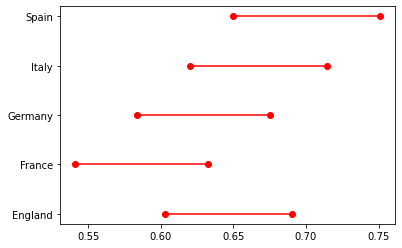

In [60]:
for lb,ub,y in zip(df_CIhome['lb'],df_CIhome['ub'],range(len(df_CIhome))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIhome)),list(df_CIhome['country']))

There is no signifcant diffrence between the countries chances of wining home matches, 
with all 5 countries have a higher than 50 precent chance of wining home matches. 
Spain has the highes probility of wining, and France has the lowest

1.2: probility of losing home games

In [61]:
CI_francel=proportion_confint(count=a[1],nobs=a1,alpha=(1-.95))
CI_francel

(0.17411643713822142, 0.2502627953674219)

In [62]:
CI_englandl=proportion_confint(count=b[1],nobs=b1,alpha=(1-.95))
CI_englandl

(0.18012455987106055, 0.2552202677151464)

In [63]:
CI_italyl=proportion_confint(count=c[1],nobs=c1,alpha=(1-.95))
CI_italyl

(0.20288031354554617, 0.28926628331309256)

In [64]:
CI_germanyl=proportion_confint(count=d[1],nobs=d1,alpha=(1-.95))
CI_germanyl

(0.16691788481812214, 0.2433385254382881)

In [65]:
CI_spainl=proportion_confint(count=e[1],nobs=e1,alpha=(1-.95))
CI_spainl

(0.14040319686664388, 0.2255274025024413)

In [73]:
CI_homel={}
CI_homel["country"]=["England","France","Germany","Italy","Spain"]
CI_homel["lb"]=[CI_englandl[0],CI_francel[0],CI_germanyl[0],CI_italyl[0],CI_spainl[0]]
CI_homel["ub"]=[CI_englandl[1],CI_francel[1],CI_germanyl[1],CI_italyl[1],CI_spainl[1]]
df_CIhomel=pd.DataFrame(CI_homel)
df_CIhomel

,country,lb,ub
0,England,0.180125,0.255220
1,France,0.174116,0.250263
2,Germany,0.166918,0.243339
3,Italy,0.202880,0.289266
4,Spain,0.140403,0.225527


([<matplotlib.axis.YTick at 0x2328fc62c70>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

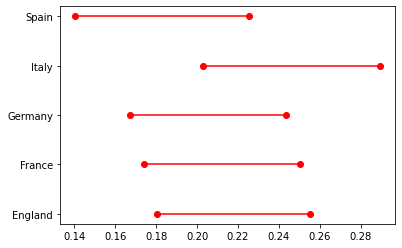

In [74]:
for lb,ub,y in zip(df_CIhomel['lb'],df_CIhomel['ub'],range(len(df_CIhomel))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIhomel)),list(df_CIhomel['country']))

As seen in the graph all of the countries have a low probiblity of losing home matches, with spain having the lowest probility of losing. There is no signifcant diffrence between the countries, and italy having the highest probility of lose.

According to the two graphs above, spain has the best preformnce in freindly games played in their home satdium, followed by England then Germany and then Italy with France having the worst preformence of the five 

1.3: probility of wining matches on neutral ground

In [99]:
df_f=df[df["tournament"]=="Friendly"]
df_neutral=df_f[df_f["neutral"]==True]
df_neutral

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_match,away_match,result_home,result_away
267,5/29/1910,Chile,Uruguay,0,3,Friendly,Buenos Aires,Argentina,True,False,False,lose,win
331,6/30/1912,Austria,Italy,5,1,Friendly,Stockholm,Sweden,True,False,False,win,lose
332,7/1/1912,Austria,Norway,1,1,Friendly,Stockholm,Sweden,True,False,False,draw,draw
333,7/3/1912,Hungary,Austria,3,0,Friendly,Stockholm,Sweden,True,False,False,win,lose
334,7/3/1912,Norway,Russia,2,1,Friendly,Stockholm,Sweden,True,False,False,win,lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43135,1/16/2022,Colombia,Honduras,2,1,Friendly,Fort Lauderdale,United States,True,False,False,win,lose
43143,1/18/2022,Moldova,Uganda,2,3,Friendly,Belek,Turkey,True,False,False,lose,win
43150,1/20/2022,South Korea,Moldova,4,0,Friendly,Antalya,Turkey,True,False,False,win,lose
43168,1/27/2022,Uzbekistan,South Sudan,3,0,Friendly,Dubai,United Arab Emirates,True,False,False,win,lose


In [100]:
df_franceneu=df_neutral[df_neutral["country"]=="France"]
df_franceneu.shape

(162, 13)

In [101]:
a=np.array(df_franceneu["result_home"].value_counts())
a1=a.sum()


In [102]:
CI_france=proportion_confint(count=a[0],nobs=a1,alpha=(1-.95))
CI_france

(0.3437565232589405, 0.4957496495805656)

In [103]:
df_englandneu=df_neutral[df_neutral["country"]=="England"]
df_englandneu.shape


(77, 13)

In [104]:
b=np.array(df_englandneu["result_home"].value_counts())
b1=b.sum()

In [105]:
CI_england=proportion_confint(count=b[0],nobs=b1,alpha=(1-.95))
CI_england

(0.31803757494100876, 0.5391052822018484)

In [106]:
df_italyneu=df_neutral[df_neutral["country"]=="Italy"]
df_italyneu.shape

(20, 13)

In [107]:
c=np.array(df_italyneu["result_home"].value_counts())
c1=c.sum()


In [108]:
CI_italy=proportion_confint(count=c[0],nobs=c1,alpha=(1-.95))
CI_italy

(0.18529670275394117, 0.6147032972460589)

In [109]:
df_germanyneu=df_neutral[df_neutral["country"]=="Germany"]

In [110]:
d=np.array(df_germanyneu["result_home"].value_counts())
d1=d.sum()

In [111]:
CI_germany=proportion_confint(count=d[0],nobs=d1,alpha=(1-.95))
CI_germany

(0.27115231267547785, 0.5660569896501035)

In [112]:
df_spainneu=df_neutral[df_neutral["country"]=="Spain"]


In [113]:
e=np.array(df_spainneu["result_home"].value_counts())
e1=e.sum()

In [114]:
CI_spain=proportion_confint(count=e[0],nobs=e1,alpha=(1-.95))
CI_spain

(0.28641917703539904, 0.5332529541121419)

In [115]:
CI_neu={}
CI_neu["country"]=["England","France","Germany","Italy","Spain"]
CI_neu["lb"]=[CI_england[0],CI_france[0],CI_germany[0],CI_italy[0],CI_spain[0]]
CI_neu["ub"]=[CI_england[1],CI_france[1],CI_germany[1],CI_italy[1],CI_spain[1]]
df_CIneu=pd.DataFrame(CI_neu)

([<matplotlib.axis.YTick at 0x23290459d60>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

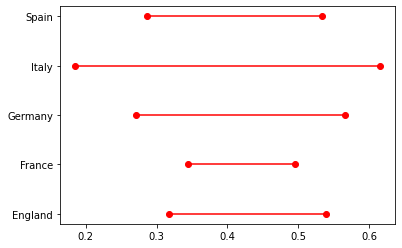

In [134]:
for lb,ub,y in zip(df_CIneu['lb'],df_CIneu['ub'],range(len(df_CIneu))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIneu)),list(df_CIneu['country']))

All four countries have almost equal probilities of wining gmaes on neutral ground, with the exception of italy which has a higher variance in its results in both the upper and lower results.

1.4: probility of losing fiendly matches on neutral stadiums

In [122]:
CI_francel=proportion_confint(count=a[1],nobs=a1,alpha=(1-.95))
CI_francel

(0.2375092279597225, 0.3797747226575614)

In [123]:
CI_englandl=proportion_confint(count=b[1],nobs=b1,alpha=(1-.95))
CI_englandl


(0.1848111440453603, 0.3866174273832111)

In [124]:

CI_italyl=proportion_confint(count=c[1],nobs=c1,alpha=(1-.95))
CI_italyl

(0.09916345547364067, 0.5008365445263593)

In [125]:
CI_germanyl=proportion_confint(count=d[1],nobs=d1,alpha=(1-.95))
CI_germanyl

(0.16505492475188838, 0.43959623803880926)

In [126]:
CI_spainl=proportion_confint(count=e[1],nobs=e1,alpha=(1-.95))
CI_spainl

(0.25542804455024765, 0.49867031610549)

In [132]:
CI_neul={}
CI_neul["country"]=["England","France","Germany","Italy","Spain"]
CI_neul["lb"]=[CI_englandl[0],CI_francel[0],CI_germanyl[0],CI_italyl[0],CI_spainl[0]]
CI_neul["ub"]=[CI_englandl[1],CI_francel[1],CI_germanyl[1],CI_italyl[1],CI_spainl[1]]
df_CIneul=pd.DataFrame(CI_neul)

([<matplotlib.axis.YTick at 0x23294531940>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

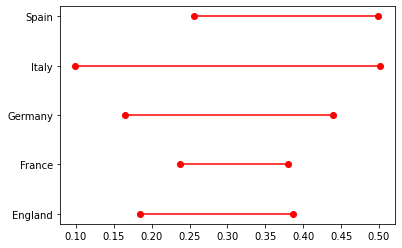

In [309]:
for lb,ub,y in zip(df_CIneul['lb'],df_CIneul['ub'],range(len(df_CIneul))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIneul)),list(df_CIneul['country']))

The four of of england,germany ,spain and france, have a similar probility of losing,with the eralier three having a lower variance in their probilibty, Italy has a large variance in its results. THere is no signifcant diffrence between their probibilty of losing

According to the two graphs above, Spain has the best preformance in friendly matches played in neutral stadiums followed by germany, france and england, and then italy with a small diffrence between their preformance.

Comparing each country preformance between friendly home games and friendly neutral games:

Spain: spain has a higher probibility of wining friendly matches on home ground than one neutral ground, and a smaller probility of wining friendly matches in neutral stadiums, showing that they are affected by wither it is a home match or not

Italy: italy has a higher probibliyt of wining friendly matches at home and a lower prbibility of losing at neutral games , showng that the team preforemones better at home game 

Germany: germany has a similar probibility of wining and losing frinedly matches played on neutral or hoem stadiums, showing they are not affected by where the match is played 

France: france has a higher probibility of wining friendly matches in home stadiums than one neutral ground, and a smaller probility of losing friendly matches on neutral stadiums, showing that they are affected by wither it is a home match or not

England: england has a lower probility of wining firendly matches if they are played on neutral ground than in their home stadium, showing that they are affected by wither it is a home match or not

2: Playing offical matches 

2.1: wining home games

In [310]:
df_o=df[df["tournament"]!="Friendly"]
df_homegame=df_o[df_o["home_match"]==True]
df_homegame.shape

(17225, 13)

In [311]:
df_francehomeo=df_homegame[df_homegame["country"]=="France"]
df_francehomeo.shape

(151, 13)

In [312]:
a=np.array(df_francehomeo["result_home"].value_counts())
a1=a.sum()

In [313]:
CI_franceo=proportion_confint(count=a[0],nobs=a1,alpha=(1-.95))
CI_franceo


(0.6432489814988812, 0.7872145946600592)

In [314]:
df_englandhomeo=df_homegame[df_homegame["country"]=="England"]
df_englandhomeo.shape

(271, 13)

In [315]:
b=np.array(df_englandhomeo["result_home"].value_counts())
b1=b.sum()

In [316]:
CI_englando=proportion_confint(count=b[0],nobs=b1,alpha=(1-.95))
CI_englando

(0.6272415832438014, 0.7380720698927299)

In [317]:
df_italyhomeo=df_homegame[df_homegame["country"]=="Italy"]
df_italyhomeo.shape

(170, 13)

In [318]:
c=np.array(df_italyhomeo["result_home"].value_counts())
c1=c.sum()

In [319]:
CI_italyo=proportion_confint(count=c[0],nobs=c1,alpha=(1-.95))
CI_italyo

(0.6499803205186274, 0.7853137971284314)

In [320]:
df_germanyhomeo=df_homegame[df_homegame["country"]=="Germany"]
df_germanyhomeo.shape


(136, 13)

In [321]:
d=np.array(df_germanyhomeo["result_home"].value_counts())
d1=d.sum()

In [322]:
CI_germanyo=proportion_confint(count=d[0],nobs=d1,alpha=(1-.95))
CI_germanyo

(0.6611475624384795, 0.8094406728556383)

In [323]:
df_spainhomeo=df_homegame[df_homegame["country"]=="Spain"]

In [324]:
e=np.array(df_spainhomeo["result_home"].value_counts())
e1=e.sum()

In [325]:
CI_spaino=proportion_confint(count=e[0],nobs=e1,alpha=(1-.95))
CI_spaino

(0.7381608053236275, 0.8705348468502856)

In [326]:
CI_homeo={}
CI_homeo["country"]=["England","France","Germany","Italy","Spain"]
CI_homeo["lb"]=[CI_englando[0],CI_franceo[0],CI_germanyo[0],CI_italyo[0],CI_spaino[0]]
CI_homeo["ub"]=[CI_englando[1],CI_franceo[1],CI_germanyo[1],CI_italyo[1],CI_spaino[1]]
df_CIhomeo=pd.DataFrame(CI_homeo)

([<matplotlib.axis.YTick at 0x23293efa190>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

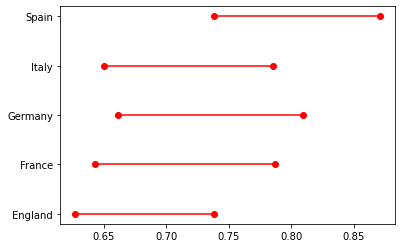

In [327]:
for lb,ub,y in zip(df_CIhomeo['lb'],df_CIhomeo['ub'],range(len(df_CIhomeo))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIhomeo)),list(df_CIhomeo['country']))

Almost all five countries have equal probilitt of wining official games at home stadium, with france having the lowest probility of the five.

2.2:losing in home stadium

In [160]:
CI_franceol=proportion_confint(count=a[1],nobs=a1,alpha=(1-.95))
CI_franceol

(0.21637422773763815, 0.31787234760482763)

In [161]:
CI_englandol=proportion_confint(count=b[1],nobs=b1,alpha=(1-.95))
CI_englandol

(0.18297006230998059, 0.30407656981437176)

In [162]:
CI_italyol=proportion_confint(count=c[1],nobs=c1,alpha=(1-.95))
CI_italyol

(0.19606675066590884, 0.3133672115982421)

In [163]:
CI_germanyol=proportion_confint(count=d[1],nobs=d1,alpha=(1-.95))
CI_germanyol

(0.16797559824042385, 0.2620585314524089)

In [164]:
CI_spainol=proportion_confint(count=e[1],nobs=e1,alpha=(1-.95))
CI_spainol

(0.15238456113798096, 0.2721964444486112)

In [165]:
CI_homeol={}
CI_homeol["country"]=["England","France","Germany","Italy","Spain"]
CI_homeol["lb"]=[CI_englandol[0],CI_franceol[0],CI_germanyol[0],CI_italyol[0],CI_spainol[0]]
CI_homeol["ub"]=[CI_englandol[1],CI_franceol[1],CI_germanyol[1],CI_italyol[1],CI_spainol[1]]
df_CIhomeol=pd.DataFrame(CI_homeol)

,country,lb,ub
0,England,0.182970,0.304077
1,France,0.216374,0.317872
2,Germany,0.167976,0.262059
3,Italy,0.196067,0.313367
4,Spain,0.152385,0.272196


([<matplotlib.axis.YTick at 0x2328f49a0d0>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

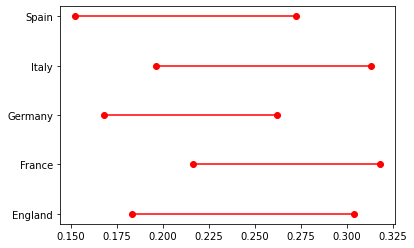

In [166]:
for lb,ub,y in zip(df_CIhomeol['lb'],df_CIhomeol['ub'],range(len(df_CIhomeol))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIhomeol)),list(df_CIhomeol['country']))

ALl five countires have  an almost equal probobility of losing offical matches in home stadiums.

Italy has the best preformance in offical games at home satdium, followed by Sapin, and then Engalnd, after that Germany, and finally France has the worst preformance of the five, However the diffrence between the five countries is not that large.

2.3: wining on neutral ground

In [191]:
df_o=df[df["tournament"]!="Friendly"]
df_neutral=df_o[df_o["neutral"]==True]

In [192]:
df_franceneuo=df_neutral[df_neutral["country"]=="France"]

In [193]:
a=np.array(df_franceneuo["result_home"].value_counts())
a1=a.sum()

In [194]:
CI_franceo=proportion_confint(count=a[0],nobs=a1,alpha=(1-.95))
CI_franceo

(0.34813092544065977, 0.48692062095109284)

In [195]:
df_englandneuo=df_neutral[df_neutral["country"]=="England"]

In [196]:
b=np.array(df_englandneuo["result_home"].value_counts())
b1=b.sum()

In [197]:
CI_englando=proportion_confint(count=b[0],nobs=b1,alpha=(1-.95))
CI_englando

(0.3647474741499174, 0.5288695471266783)

In [198]:
df_italyneuo=df_neutral[df_neutral["country"]=="Italy"]
df_italyneuo.shape

(96, 13)

In [199]:
c=np.array(df_italyneuo["result_home"].value_counts())
c1=c.sum()

In [200]:
CI_italyo=proportion_confint(count=c[0],nobs=c1,alpha=(1-.95))
CI_italyo

(0.3080048833111753, 0.5044951166888246)

In [201]:
df_germanyneuo=df_neutral[df_neutral["country"]=="Germany"]

In [202]:
d=np.array(df_germanyneuo["result_home"].value_counts())
d1=d.sum()

In [203]:
CI_germanyo=proportion_confint(count=d[0],nobs=d1,alpha=(1-.95))
CI_germanyo

(0.34216314039440565, 0.5149797167484514)

In [303]:
df_spainneuo=df_neutral[df_neutral["country"]=="Spain"]

(66, 13)

In [205]:
e=np.array(df_spainneuo["result_home"].value_counts())
e1=e.sum()

In [206]:
CI_spaino=proportion_confint(count=e[0],nobs=e1,alpha=(1-.95))
CI_spaino

(0.27605702429421597, 0.5118217635845719)

In [207]:
CI_neuo={}
CI_neuo["country"]=["England","France","Germany","Italy","Spain"]
CI_neuo["lb"]=[CI_englando[0],CI_franceo[0],CI_germanyo[0],CI_italyo[0],CI_spaino[0]]
CI_neuo["ub"]=[CI_englando[1],CI_franceo[1],CI_germanyo[1],CI_italyo[1],CI_spaino[1]]
df_CIneuo=pd.DataFrame(CI_neuo)

([<matplotlib.axis.YTick at 0x23292357a00>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

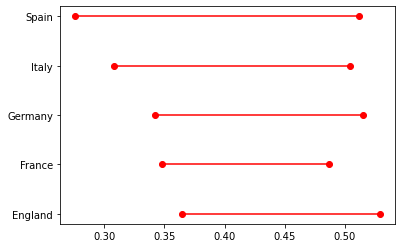

In [208]:
for lb,ub,y in zip(df_CIneuo['lb'],df_CIneuo['ub'],range(len(df_CIneuo))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIneuo)),list(df_CIneuo['country']))

All five have equal probility of losing offical matches in home stadiums, with spain having the largest v=range in its probability 

2.4: losing on neutral ground

In [209]:
CI_francelo=proportion_confint(count=a[1],nobs=a1,alpha=(1-.95))
CI_francelo

(0.2588474263915707, 0.39063710969090354)

In [210]:
CI_englandlo=proportion_confint(count=b[1],nobs=b1,alpha=(1-.95))
CI_englandlo

(0.2689197521097339, 0.4261157088831739)

In [211]:
CI_italylo=proportion_confint(count=c[1],nobs=c1,alpha=(1-.95))
CI_italylo

(0.3080048833111753, 0.5044951166888246)

In [212]:
CI_germanylo=proportion_confint(count=d[1],nobs=d1,alpha=(1-.95))
CI_germanylo

(0.2510225828295837, 0.41564408383708296)

In [215]:
CI_spainlo=proportion_confint(count=e[1],nobs=e1,alpha=(1-.95))
CI_spainlo

(0.2335291952906477, 0.4634405016790493)

In [216]:
CI_neulo={}
CI_neulo["country"]=["England","France","Germany","Italy","Spain"]
CI_neulo["lb"]=[CI_englandlo[0],CI_francelo[0],CI_germanylo[0],CI_italylo[0],CI_spainlo[0]]
CI_neulo["ub"]=[CI_englandlo[1],CI_francelo[1],CI_germanylo[1],CI_italylo[1],CI_spainlo[1]]
df_CIneulo=pd.DataFrame(CI_neulo)

([<matplotlib.axis.YTick at 0x232923c3f70>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

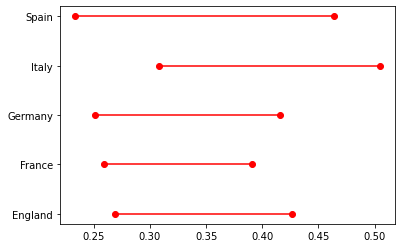

In [217]:
for lb,ub,y in zip(df_CIneulo['lb'],df_CIneulo['ub'],range(len(df_CIneulo))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIneulo)),list(df_CIneulo['country']))

All five have equal probility of losing offical matches in home stadiums, with spain having the largest range in its probability 

According to the two graphs above, there is almost no diffrence between the prefromance of the five countries in offical matches played on neutral ground 

Comparing each country preformacne in home and neutral offical games, comparing to their preformance in friendly games:

Spain: has a higher probibilty of wining official matches if they are played at home, when compared to playing offical matches at neutral ground. This is similar to Spaain's probiblity of wining for friendly matches showing that there is no signifacnt diffrence between spains preformence in offical and friendly matches. They perfrom better at friendly matches even though diffrence is not signifcant 

Italy: has an equal probiblity of wining and losing offical matches when playing on neutral, moreover their probility of wining friendly matches played at home is higher than that on neutral ground. This is diffrent than their probiblity of wining friendly matches where they preform worse in offical matches played on neutral ground than they do in friendly matches 

Germany: has a has a higher probibilty of wining official matches if they are played at home, when compared to playing offical matches at neutral ground. This is diffrent from their probility for friendly matches where there is a signifacnt diffrence in their preformance in neutral games for firendly and offical matches, they preform better in the friendly matches  better for friendly matches 

France: France has a higher probibilty of wining official matches if they are played at home, when compared to playing offical matches at neutral ground. This is similar to their probiblity of wining friendly matches showing that there is no signifacnt diffrence between spains preformence in offical and friendly matches.However, they perfrom better at friendly matches even though diffrence is not signifcant 

Engalnd:England has an equal probiblity of wining and losing offical matches when playing on neutral, moreover their probility of wining friendly matches played at home is higher than that on neutral ground. This is diffrent than their probiblity of wining friendly matches where they preform worse in offical matches played on neutral ground than they do in friendly matches 

3: world cup qualifications matches 

3.1: wining world cup qualification matches 

In [240]:
df_quali=df[df["tournament"]=="FIFA World Cup qualification"]
df_quali.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_match,away_match,result_home,result_away
1591,6/11/1933,Sweden,Estonia,6,2,FIFA World Cup qualification,Stockholm,Sweden,False,True,False,win,lose
1596,6/29/1933,Lithuania,Sweden,0,2,FIFA World Cup qualification,Kaunas,Lithuania,False,True,False,lose,win


In [258]:
df_franceq=df_quali[df_quali["country"]=="France"]


In [259]:
a=np.array(df_franceq["result_home"].value_counts())
a1=a.sum()

In [260]:
CI_franceq=proportion_confint(count=a[0],nobs=a1,alpha=(1-.95))
CI_franceq

(0.5850838683087067, 0.81174152851669)

In [270]:
df_englandq=df_quali[df_quali["country"]=="England"]


In [271]:
b=np.array(df_englandq["result_home"].value_counts())
b1=b.sum()
b

array([48, 13,  3], dtype=int64)

In [272]:
CI_englandq=proportion_confint(count=b[0],nobs=b1,alpha=(1-.95))
CI_englandq

(0.6439138374303589, 0.8560861625696411)

In [308]:
df_italyq=df_quali[df_quali["country"]=="Italy"]

(70, 13)

In [274]:
c=np.array(df_italyq["result_home"].value_counts())
c1=c.sum()

In [275]:
CI_italyq=proportion_confint(count=c[0],nobs=c1,alpha=(1-.95))
CI_italyq

(0.62439657000099, 0.832746287141867)

In [307]:
df_germanyq=df_quali[df_quali["country"]=="Germany"]

(57, 13)

In [277]:
d=np.array(df_germanyq["result_home"].value_counts())
d1=d.sum()

In [278]:
CI_germanyq=proportion_confint(count=d[0],nobs=d1,alpha=(1-.95))
CI_germanyq

(0.6426394331057614, 0.8661324967188)

In [306]:
df_spainq=df_quali[df_quali["country"]=="Spain"]

(70, 13)

In [280]:
e=np.array(df_spainq["result_home"].value_counts())
e1=e.sum()

In [281]:
CI_spainq=proportion_confint(count=e[0],nobs=e1,alpha=(1-.95))
CI_spainq

(0.6404715250145009, 0.8452427606997849)

In [282]:
CI_quali={}
CI_quali["country"]=["England","France","Germany","Italy","Spain"]
CI_quali["lb"]=[CI_englandq[0],CI_franceq[0],CI_germanyq[0],CI_italyq[0],CI_spainq[0]]
CI_quali["ub"]=[CI_englandq[1],CI_franceq[1],CI_germanyq[1],CI_italyq[1],CI_spainq[1]]
df_CIquali=pd.DataFrame(CI_quali)

([<matplotlib.axis.YTick at 0x232924e7670>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

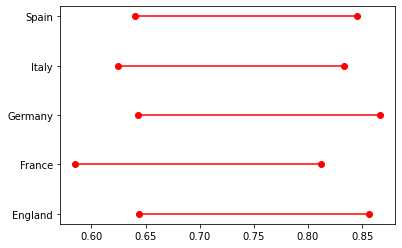

In [283]:
for lb,ub,y in zip(df_CIquali['lb'],df_CIquali['ub'],range(len(df_CIquali))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIquali)),list(df_CIquali['country']))

([<matplotlib.axis.YTick at 0x23293efdeb0>,
 [Text(0, 0, 'England'),
  Text(0, 1, 'France'),
  Text(0, 2, 'Germany'),
  Text(0, 3, 'Italy'),
  Text(0, 4, 'Spain')])

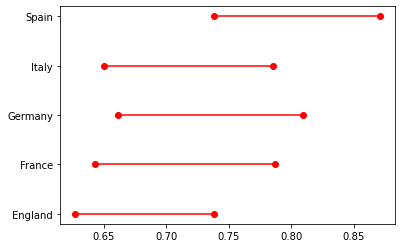

In [328]:
for lb,ub,y in zip(df_CIhomeo['lb'],df_CIhomeo['ub'],range(len(df_CIhomeo))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_CIhomeo)),list(df_CIhomeo['country']))

The three of Spain,England,Germany have the highest probaibilty of wining world cup qualifications played at home, closely follwed by Italy and then France, Moreover there is no significant diffrence between the countries probability of wining

Comparing each country preforamce in world cup qualification to their overall preformance in offical games:

Spain:Spain's preformance during the owrld cup qualification is worse than their perfomencw=ed uring offcial games in genral 

Italy:Itay perfoemd better during world cup qualifications than they did in genral 

Germany: Germany prefromance during world cup qualification is similar to theres durring offical matches in genral.

France: France preformance during the owrld cup qualification is worse than their perfomencw=ed uring offcial games in genral 

Engalnd: England preformed susbstanially better in world cup qualification than they did in offical matches in genral 

Conclusion:

Part 2:

In [329]:
df=pd.read_csv('covid_data.csv',encoding='latin-1')
df.shape

(122843, 11)

In [330]:
df.head()

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb


In [332]:
cats=['Fri', 'Sat', 'Sun','Mon','Tue','Wed','Thu']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['weekdays'] = df['weekdays'].astype(cat_type)

In [333]:
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['month'] = df['month'].astype(cat_type)

In [334]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [336]:
def get_ci_ub(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [337]:
start_date1='2020-01-01'
end_date1='2020-12-31'
start_date2='2021-01-01'
end_date2='2021-12-31'

In [338]:
c20=(df["date"]>=start_date1) & (df["date"]<=end_date1)
c21=(df["date"]>=start_date2) & (df["date"]<=end_date2)

In [339]:
conditions=[(c20==True),(c21==True)]
values=["2020","2021"]

In [340]:
df["year"]=np.select(conditions,values)
df

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,year
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb,2020
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb,2020
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb,2020
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb,2020
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec,2021
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec,2021
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec,2021
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec,2021


In [359]:
df["Fatality_rate"]=df["ddeaths"]/df["dcases"]

In [360]:
df.head(2)

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,year,Fatality_rate
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb,2020,0.0
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb,2020,NaN


4: comparing between 2020 and 2021

4.1: comparing daily cases reported:

In [341]:
stats=df.groupby("year").agg({"dcases": [np.mean, np.std, np.size]})
stats

dcases                     
             mean           std   size
year                                  
2020  1525.522581   9058.721229  54958
2021  3024.213361  14296.743795  67885

In [342]:
ci95_hic = []
ci95_loc= []

In [343]:
print(stats.index[0])
for i in stats.index:
    print(i)
    print(stats.loc[i])
    m, s, n,  = stats.loc[i]
    print(n)
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hic.append(x[1])
    ci95_loc.append(x[0])

2020
2020
dcases  mean     1525.522581
        std      9058.721229
        size    54958.000000
Name: 2020, dtype: float64
54958.0
2021
dcases  mean     3024.213361
        std     14296.743795
        size    67885.000000
Name: 2021, dtype: float64
67885.0


In [344]:
stats['ci95_hic'] = ci95_hic
stats['ci95_loc'] = ci95_loc
stats

dcases                          ci95_hic     ci95_loc
             mean           std   size                          
year                                                            
2020  1525.522581   9058.721229  54958  1601.260443  1449.784719
2021  3024.213361  14296.743795  67885  3131.763074  2916.663648

In [345]:
df_2120c=pd.DataFrame(stats)

In [346]:
y=df_2120c.index
df_2120c["year"]=y
df_2120c

dcases                          ci95_hic     ci95_loc  year
             mean           std   size                                
year                                                                  
2020  1525.522581   9058.721229  54958  1601.260443  1449.784719  2020
2021  3024.213361  14296.743795  67885  3131.763074  2916.663648  2021

Text(0.5, 1.0, ' daily cases 2020 and 2021')

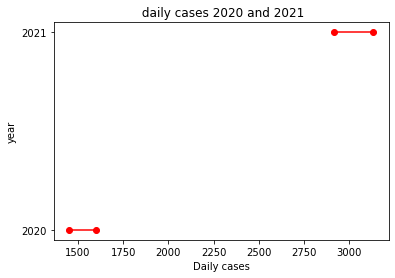

In [368]:
for lb,ub,y in zip(df_2120c['ci95_loc'],df_2120c['ci95_hic'],range(len(df_2120c))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_2120c)),list(df_2120c['year']))
plt.xlabel("Daily cases")
plt.ylabel("year")
plt.title(" daily cases 2020 and 2021")

The mean daily cases in 2021 is almost double that of 2020. This could be due to the new strains that spread more and faster than the original starin such as the delta strain and the increased avalibilty of tests throught 2021, that were not avalibale in 202 due to slow production. 

4.2: comparing daily deaths:

In [348]:
statsd=df.groupby("year").agg({"ddeaths": [np.mean, np.std, np.size]})
statsd

ddeaths                   
           mean         std   size
year                              
2020  34.275519  150.460086  54958
2021  52.402946  228.974703  67885

In [349]:
ci95_hid = []
ci95_lod= []

In [353]:
for i in statsd.index:
    m, s, n = statsd.loc[i]
    x=scipy.stats.t.interval(.95, n-1, m,s/np.sqrt(n-1))
    ci95_hid.append(x[1])
    ci95_lod.append(x[0])

In [354]:
statsd['ci95_hid'] = ci95_hid
statsd['ci95_lod'] = ci95_lod
statsd

ddeaths                      ci95_hid   ci95_lod
           mean         std   size                      
year                                                    
2020  34.275519  150.460086  54958  35.533481  33.017558
2021  52.402946  228.974703  67885  54.125448  50.680445

In [357]:
df_2120d=pd.DataFrame(statsd)
y=df_2120d.index
df_2120d["year"]=y
df_2120d

ddeaths                      ci95_hid   ci95_lod  year
           mean         std   size                            
year                                                          
2020  34.275519  150.460086  54958  35.533481  33.017558  2020
2021  52.402946  228.974703  67885  54.125448  50.680445  2021

([<matplotlib.axis.YTick at 0x23295331ee0>,
 [Text(0, 0, '2020'), Text(0, 1, '2021')])

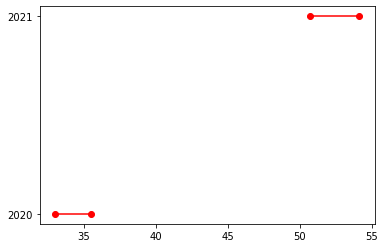

In [358]:
for lb,ub,y in zip(df_2120d['ci95_lod'],df_2120d['ci95_hid'],range(len(df_2120d))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_2120d)),list(df_2120d['year']))
plt.xlabel("Daily deaths")
plt.ylabel("year")
plt.title("Daily deaths 2020 and 2021")

The daily deaths have substantily increasd between 2020 and 2021, increased testing could be the reason behined the increase in the daily deaths as without tesing covid realted deaths could have been unnoticed or reported as somthing else.

In [ ]:
4.3 comparing fatality rate:

In [ ]:
stats

The increased infection rate does not equal the increase in deaths or fatality rate, indicating that the viruse has gotten weaker from 2020 to 2021 or has had a reduced affect on our health.

5: comparing regions between 2020 and 2021

5.1 comparing daily cases

In [361]:
stats1c=df.groupby(['region','year']).agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

In [362]:
statsdcases1=stats1c.reset_index()

In [363]:
statsdcases1.columns=['region','year','mean','std','size','ub','lb']

In [364]:
df_regionc=pd.DataFrame(statsdcases1)

In [365]:
df_regionc20=df_regionc[df_regionc['year']=='2020']
df_regionc21=df_regionc[df_regionc['year']=='2021']

([<matplotlib.axis.YTick at 0x23295394be0>,
 [Text(0, 0, 'East Asia & Pacific'),
  Text(0, 1, 'Europe & Central Asia'),
  Text(0, 2, 'Latin America & Caribbean'),
  Text(0, 3, 'Middle East & North Africa'),
  Text(0, 4, 'North America(region)'),
  Text(0, 5, 'South Asia'),
  Text(0, 6, 'Sub-Saharan Africa')])

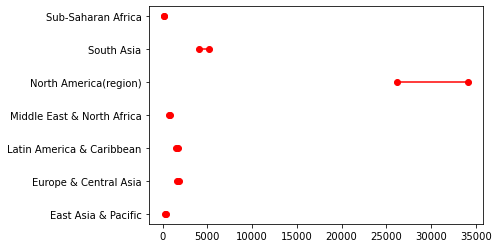

In [366]:
for lb,ub,y in zip(df_regionc20['ub'],df_regionc20['lb'],range(len(df_regionc20))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_regionc20)),list(df_regionc20['region']))
plt.xlabel("Daily cases")
plt.ylabel("Region")
plt.title("Region  daily cases 2020")

North America has a substanialy larger number of cases compared to other regions, this could be to the avaliablity and the conduction of more tests than any other region, its is followed by south asia which is one ofe the moste poulated regions that also has access to covid tests, unlike Latin america and sub_saharan Africa whose small infection number can be due to the lack of tests despite having a large popoulation. IN Europe the samll infection rates could be a result of the strict lockdown that was intiated by multiple countries at the start of the pandamic.

([<matplotlib.axis.YTick at 0x2329540c9a0>,
 [Text(0, 0, 'East Asia & Pacific'),
  Text(0, 1, 'Europe & Central Asia'),
  Text(0, 2, 'Latin America & Caribbean'),
  Text(0, 3, 'Middle East & North Africa'),
  Text(0, 4, 'North America(region)'),
  Text(0, 5, 'South Asia'),
  Text(0, 6, 'Sub-Saharan Africa')])

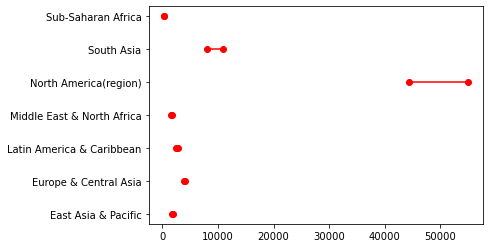

In [367]:
for lb,ub,y in zip(df_regionc21['ub'],df_regionc21['lb'],range(len(df_regionc21))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_regionc21)),list(df_regionc21['region']))
plt.xlabel("Daily cases")
plt.ylabel("Region")
plt.title("Region  daily cases 2021")

North america has had the largest increase in the reported cases compared to any of the other regions,

5.2: daily deaths by region

In [405]:
stats1deaths=df.groupby(["region","year"]).agg({"ddeaths": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

In [406]:
stats1d=stats1deaths.reset_index()

In [407]:
stats1d.columns=['region','year','mean','std','size','ub','lb']
df_regiond=pd.DataFrame(stats1d)
df_regiond20=df_regiond[df_regiond['year']=='2020']
df_regiond21=df_regiond[df_regiond['year']=='2021']

([<matplotlib.axis.YTick at 0x232956e0d00>,
 [Text(0, 0, 'East Asia & Pacific'),
  Text(0, 1, 'Europe & Central Asia'),
  Text(0, 2, 'Latin America & Caribbean'),
  Text(0, 3, 'Middle East & North Africa'),
  Text(0, 4, 'North America(region)'),
  Text(0, 5, 'South Asia'),
  Text(0, 6, 'Sub-Saharan Africa')])

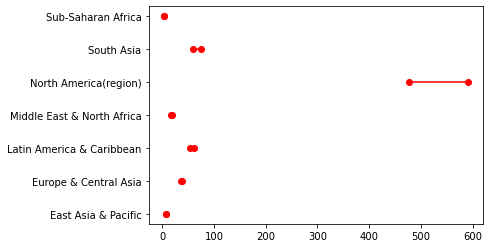

In [401]:
for lb,ub,y in zip(df_regiond20['lb'],df_regiond20['ub'],range(len(df_regiond20))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_regiond20)),list(df_regiond20['region']))
plt.xlabel("Daily deaths")
plt.ylabel("Region")
plt.title("Region  daily deaths 2020")

([<matplotlib.axis.YTick at 0x23295758160>,
 [Text(0, 0, 'East Asia & Pacific'),
  Text(0, 1, 'Europe & Central Asia'),
  Text(0, 2, 'Latin America & Caribbean'),
  Text(0, 3, 'Middle East & North Africa'),
  Text(0, 4, 'North America(region)'),
  Text(0, 5, 'South Asia'),
  Text(0, 6, 'Sub-Saharan Africa')])

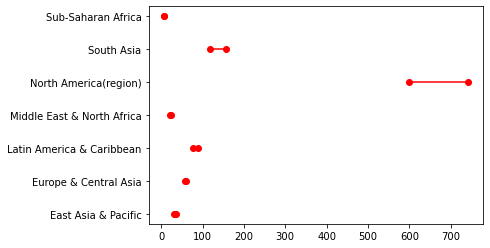

In [402]:
for lb,ub,y in zip(df_regiond21['lb'],df_regiond21['ub'],range(len(df_regiond21))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_regiond21)),list(df_regiond21['region']))
plt.xlabel("Daily deaths")
plt.ylabel("Region")
plt.title("Region  daily deaths 2021")

5.3 comparing fatality rate:

6: comparing by continent:

6.1 comparing daily cases :

In [415]:
stats2cases=df.groupby(["continent","year"]).agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

In [416]:
stats2c=stats2cases.reset_index()

In [417]:
stats2c.columns=['continent','year','mean','std','size','ub','lb']
df_regionc=pd.DataFrame(stats2c)

In [418]:
df_continent20c=df_regionc[df_regionc['year']=='2020']
df_continent21c=df_regionc[df_regionc['year']=='2021']

Text(0.5, 1.0, 'continent  daily cases 2020')

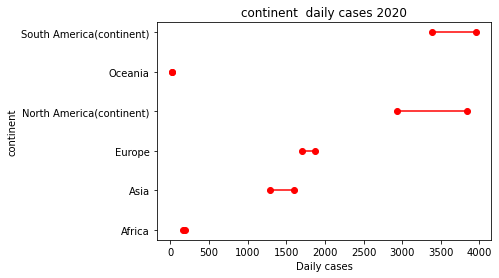

In [419]:
for lb,ub,y in zip(df_continent20c['lb'],df_continent20c['ub'],range(len(df_continent20c))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_continent20c)),list(df_continent20c['continent']))
plt.xlabel("Daily cases")
plt.ylabel("continent")
plt.title("continent  daily cases 2020")

Text(0.5, 1.0, 'continent  daily cases 2020')

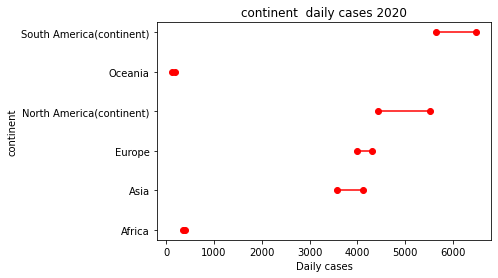

In [420]:
for lb,ub,y in zip(df_continent21c['lb'],df_continent21c['ub'],range(len(df_continent21c))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_continent21c)),list(df_continent21c['continent']))
plt.xlabel("Daily cases")
plt.ylabel("continent")
plt.title("continent  daily cases 2020")

6.2 comapring daily deaths:

In [409]:
stats2deaths=df.groupby(["continent","year"]).agg({"ddeaths": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

In [410]:
stats2d=stats2deaths.reset_index()

In [411]:
stats2d.columns=['continent','year','mean','std','size','ub','lb']
df_regiond=pd.DataFrame(stats2d)

In [412]:
df_continent20=df_regiond[df_regiond['year']=='2020']
df_continent21=df_regiond[df_regiond['year']=='2021']

Text(0.5, 1.0, 'continent  daily deaths 2020')

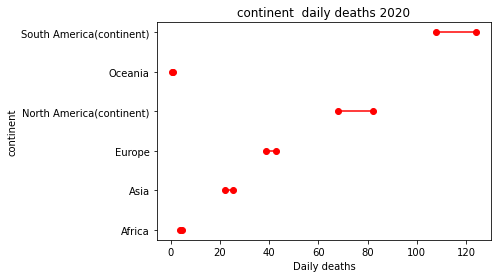

In [413]:
for lb,ub,y in zip(df_continent20['lb'],df_continent20['ub'],range(len(df_continent20))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_continent20)),list(df_continent20['continent']))
plt.xlabel("Daily deaths")
plt.ylabel("continent")
plt.title("continent  daily deaths 2020")

Text(0.5, 1.0, 'continent  daily deaths 2021')

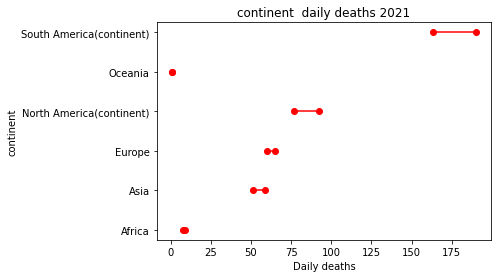

In [414]:
for lb,ub,y in zip(df_continent21['lb'],df_continent21['ub'],range(len(df_continent21))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_continent21)),list(df_continent21['continent']))
plt.xlabel("Daily deaths")
plt.ylabel("continent")
plt.title("continent  daily deaths 2021")

6.3 comparing fatality rate:

7 comapring by countries income

7.1comparing daily infections:

In [429]:
stats3cases=df.groupby(["income","year"]).agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

In [422]:
stats3c=stats3cases.reset_index()

In [423]:
stats3c.columns=['Income','year','mean','std','size','ub','lb']
df_incomec=pd.DataFrame(stats3c)

In [424]:
df_income20c=df_incomec[df_incomec['year']=='2020']
df_income21c=df_incomec[df_incomec['year']=='2021']

Text(0.5, 1.0, 'income  daily cases 2020')

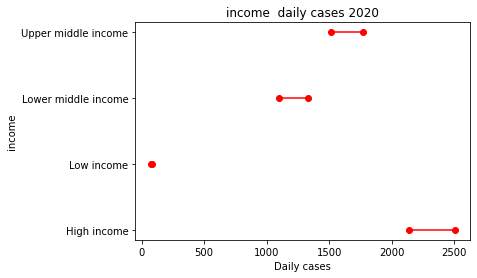

In [426]:
for lb,ub,y in zip(df_income20c['lb'],df_income20c['ub'],range(len(df_income20c))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_income20c)),list(df_income20c['Income']))
plt.xlabel("Daily cases")
plt.ylabel("income")
plt.title("income  daily cases 2020")

Text(0.5, 1.0, 'Income  daily cases 2021')

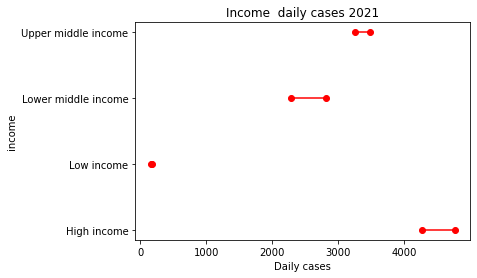

In [428]:
for lb,ub,y in zip(df_income21c['lb'],df_income21c['ub'],range(len(df_income21c))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_income21c)),list(df_income21c['Income']))
plt.xlabel("Daily cases")
plt.ylabel("income")
plt.title("Income  daily cases 2021")

7.2 comparing daily deaths:

In [431]:
stats3deaths=df.groupby(["income","year"]).agg({"ddeaths": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

In [432]:
stats3d=stats3deaths.reset_index()

In [433]:
stats3d.columns=['Income','year','mean','std','size','ub','lb']
df_incomed=pd.DataFrame(stats3d)

In [434]:
df_income20d=df_incomed[df_incomed['year']=='2020']
df_income21d=df_incomed[df_incomed['year']=='2021']

Text(0.5, 1.0, 'income  daily deaths 2020')

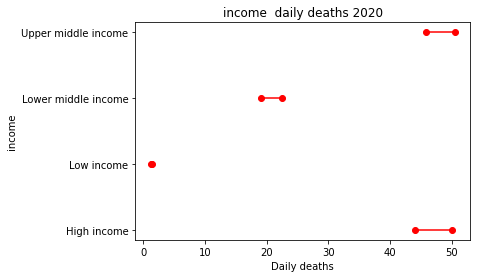

In [435]:
for lb,ub,y in zip(df_income20d['lb'],df_income20d['ub'],range(len(df_income20d))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_income20d)),list(df_income20d['Income']))
plt.xlabel("Daily deaths")
plt.ylabel("income")
plt.title("income  daily deaths 2020")

Text(0.5, 1.0, 'income  daily deaths 2021')

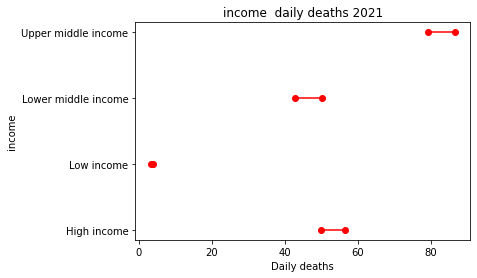

In [436]:
for lb,ub,y in zip(df_income21d['lb'],df_income21d['ub'],range(len(df_income21d))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_income21d)),list(df_income21d['Income']))
plt.xlabel("Daily deaths")
plt.ylabel("income")
plt.title("income  daily deaths 2021")

7.3 comparing fatality rate:

Conclusion